In [1]:
import pandas as pd
import numpy as np

## Importing Dataset¶

In [2]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_df.shape

(21417, 4)

In [6]:
fake_df.shape

(23481, 4)

## Inserting a Target Column "label"

In [7]:
fake_df["label"] = 0
true_df["label"] = 1

## Merging True and Fake Dataframes¶

In [8]:
news = pd.concat([fake_df, true_df], axis=0)

In [9]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
news.shape

(44898, 5)

In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


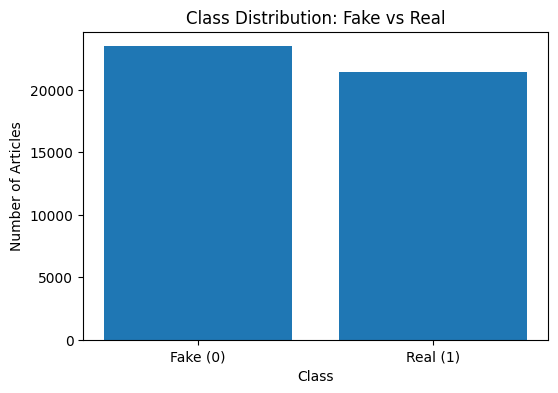

In [13]:
import matplotlib.pyplot as plt

label_counts = news['label'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(['Fake (0)', 'Real (1)'], label_counts.values)
plt.title("Class Distribution: Fake vs Real")
plt.xlabel("Class")
plt.ylabel("Number of Articles")
plt.show()

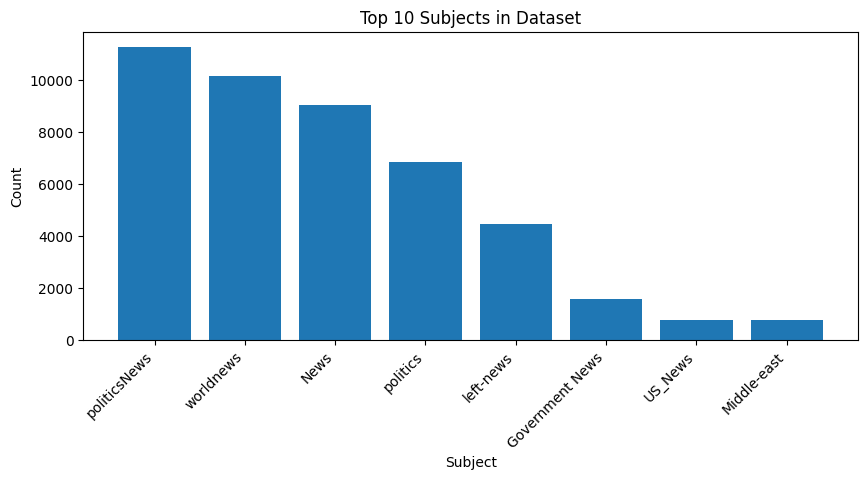

In [14]:
top_subjects = news['subject'].value_counts().head(10)

plt.figure(figsize=(10,4))
plt.bar(top_subjects.index, top_subjects.values)
plt.title("Top 10 Subjects in Dataset")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


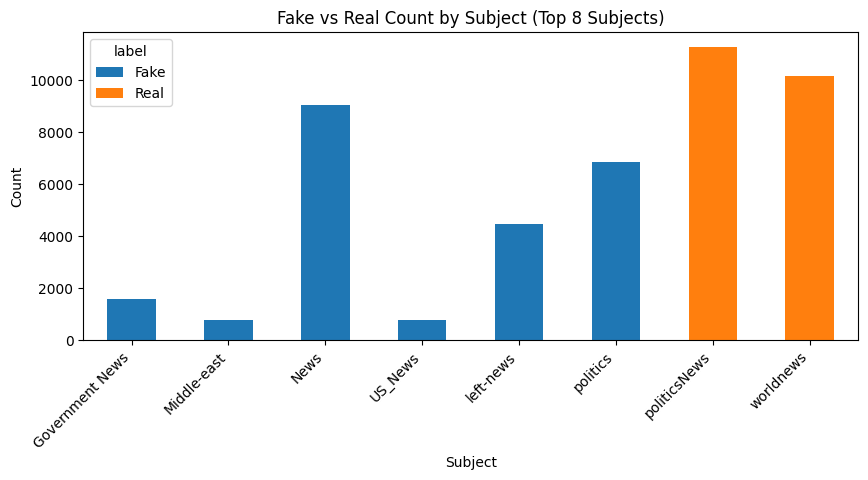

In [15]:
top_subjects = news['subject'].value_counts().head(8).index
sub_df = news[news['subject'].isin(top_subjects)]

counts = sub_df.groupby(['subject', 'label']).size().unstack(fill_value=0)
counts = counts.rename(columns={0: "Fake", 1: "Real"})

counts.plot(kind="bar", stacked=True, figsize=(10,4))
plt.title("Fake vs Real Count by Subject (Top 8 Subjects)")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


## Removing unnecessary columns

In [16]:
news = news.drop(['title','subject','date'],axis=1)

In [17]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


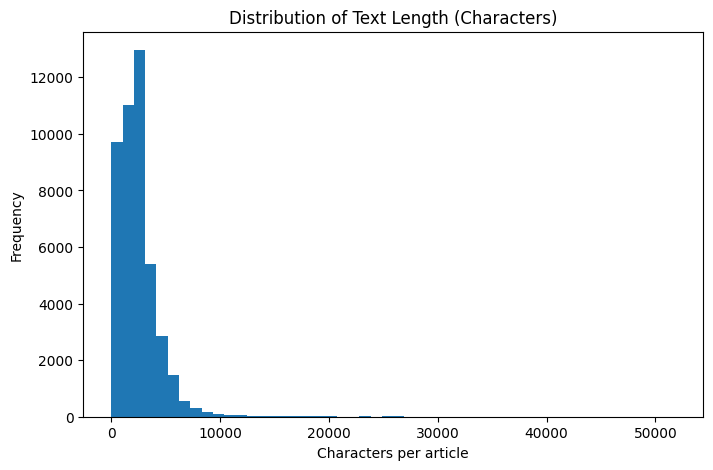

In [18]:
news['char_len'] = news['text'].apply(len)

plt.figure(figsize=(8,5))
plt.hist(news['char_len'], bins=50)
plt.title("Distribution of Text Length (Characters)")
plt.xlabel("Characters per article")
plt.ylabel("Frequency")
plt.show()

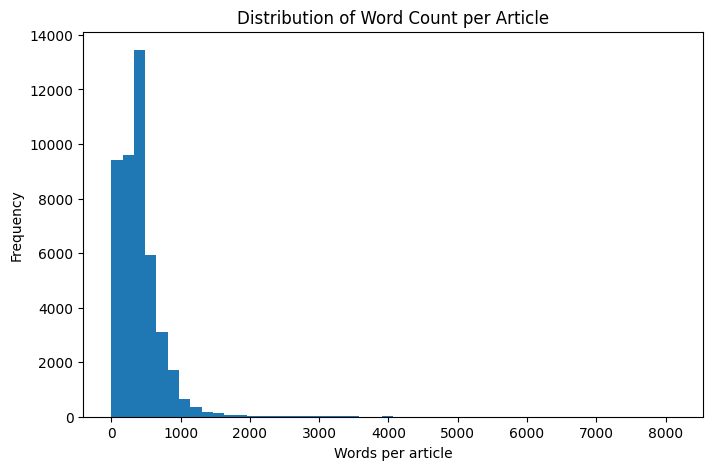

In [19]:
news['word_count'] = news['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(news['word_count'], bins=50)
plt.title("Distribution of Word Count per Article")
plt.xlabel("Words per article")
plt.ylabel("Frequency")
plt.show()

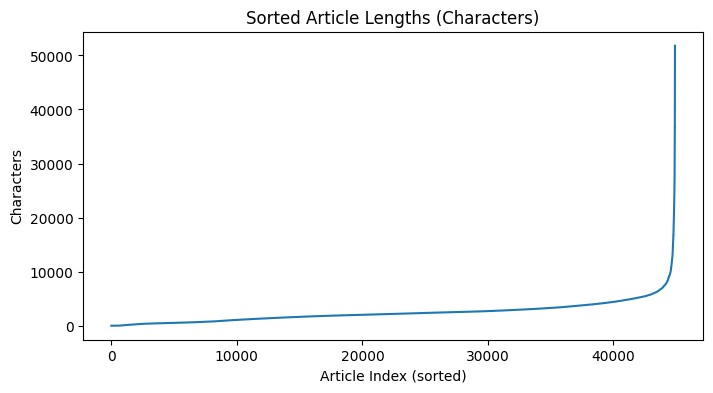

In [20]:
sorted_len = news['char_len'].sort_values().reset_index(drop=True)

plt.figure(figsize=(8,4))
plt.plot(sorted_len.values)
plt.title("Sorted Article Lengths (Characters)")
plt.xlabel("Article Index (sorted)")
plt.ylabel("Characters")
plt.show()

## Reshuffling the dataframe¶

In [21]:
news = news.sample(frac=1) #Reshuffling

In [22]:
news.head()

,text,label,char_len,word_count
6800,Fox News loves Wisconsin s Sheriff David Clark...,0,3166,575
11405,GAZA (Reuters) - The Red Cross said on Monday ...,1,2597,440
12448,The bitter battle for the presidency is over. ...,0,2005,317
21832,Adios America Census: Record 51 million immigr...,0,2788,452
23337,Tune in to the Alternate Current Radio Network...,0,920,144


In [23]:
news.reset_index(inplace=True)

In [24]:
news.head()

,index,text,label,char_len,word_count
0,6800,Fox News loves Wisconsin s Sheriff David Clark...,0,3166,575
1,11405,GAZA (Reuters) - The Red Cross said on Monday ...,1,2597,440
2,12448,The bitter battle for the presidency is over. ...,0,2005,317
3,21832,Adios America Census: Record 51 million immigr...,0,2788,452
4,23337,Tune in to the Alternate Current Radio Network...,0,920,144


In [25]:
news.drop(['index'],axis=1, inplace = True)

In [26]:
news.head()

,text,label,char_len,word_count
0,Fox News loves Wisconsin s Sheriff David Clark...,0,3166,575
1,GAZA (Reuters) - The Red Cross said on Monday ...,1,2597,440
2,The bitter battle for the presidency is over. ...,0,2005,317
3,Adios America Census: Record 51 million immigr...,0,2788,452
4,Tune in to the Alternate Current Radio Network...,0,920,144


In [27]:
import re

## Creating a Text Preprocessing Function

In [28]:
def wordopt(text):
    #converting into lowercase
    text = text.lower()

    #Removing URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    #Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    #Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    #Removing digits
    text = re.sub(r'\d', '', text)

    #Removing newline characters
    text = re.sub(r'\n', ' ', text)

    return text
    

In [29]:
news['text'] = news['text'].apply(wordopt)

In [30]:
news['text']

0        fox news loves wisconsin s sheriff david clark...
1        gaza reuters  the red cross said on monday isr...
2        the bitter battle for the presidency is over d...
3        adios america census record  million immigrant...
4        tune in to the alternate current radio network...
                               ...                        
44893    after several days of silence hillary clinton ...
44894    washington reuters  special counsel robert mue...
44895    washington reuters  the us government on frida...
44896     washington reuters  foreign diplomats are exp...
44897    congressman paul ryan received enough support ...
Name: text, Length: 44898, dtype: object

In [31]:
X = news['text']
y = news['label']

In [32]:
X

0        fox news loves wisconsin s sheriff david clark...
1        gaza reuters  the red cross said on monday isr...
2        the bitter battle for the presidency is over d...
3        adios america census record  million immigrant...
4        tune in to the alternate current radio network...
                               ...                        
44893    after several days of silence hillary clinton ...
44894    washington reuters  special counsel robert mue...
44895    washington reuters  the us government on frida...
44896     washington reuters  foreign diplomats are exp...
44897    congressman paul ryan received enough support ...
Name: text, Length: 44898, dtype: object

In [33]:
y

0        0
1        1
2        0
3        0
4        0
        ..
44893    0
44894    1
44895    1
44896    1
44897    0
Name: label, Length: 44898, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 42)

In [36]:
X_train.shape

(31428,)

In [37]:
X_test.shape

(13470,)

## Feature Extraction

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorization = TfidfVectorizer()

In [40]:
xv_train = vectorization.fit_transform(X_train)

In [41]:
xv_test = vectorization.transform(X_test)

In [42]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6457542 stored elements and shape (31428, 174101)>

In [43]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2721982 stored elements and shape (13470, 174101)>

### Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR = LogisticRegression(max_iter=1000)

In [46]:
LR.fit(xv_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
pred_lr = LR.predict(xv_test)

In [48]:
LR.score(xv_test, y_test)

0.9871566443949518

In [49]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


In [50]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Regression Accuracy: 0.9871566443949518
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7061
           1       0.98      0.99      0.99      6409

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [84]:
pd.DataFrame([{
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, pred_lr),
    "Precision": precision_score(y_test, pred_lr),
    "Recall": recall_score(y_test, pred_lr),
    "F1 Score": f1_score(y_test, pred_lr)
}])

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.987157,0.984161,0.988922,0.986536


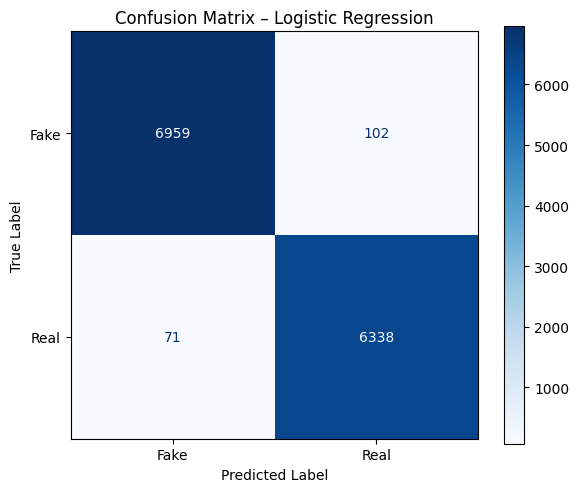

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr, display_labels=["Fake", "Real"], cmap="Blues",)

plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.gcf().set_size_inches(6, 5)
plt.tight_layout()
plt.show()

In [90]:
from sklearn.metrics import precision_recall_curve

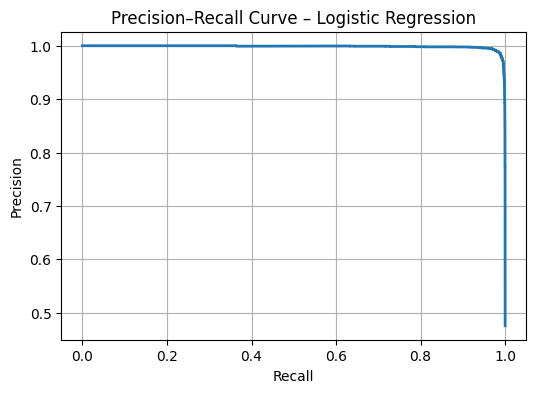

In [91]:
lr_probs = LR.predict_proba(xv_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

plt.figure(figsize=(6,4))
plt.plot(lr_recall, lr_precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")
plt.grid(True)
plt.show()

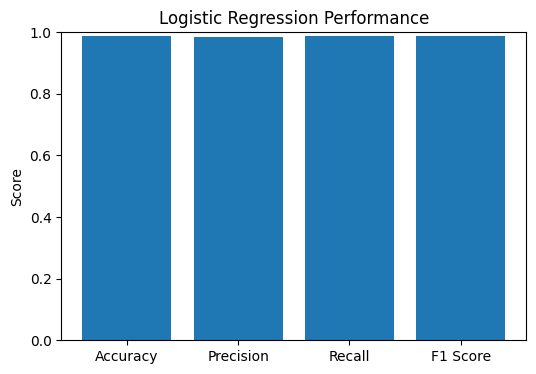

In [93]:
metrics = {
    "Accuracy": accuracy_score(y_test, pred_lr),
    "Precision": precision_score(y_test, pred_lr),
    "Recall": recall_score(y_test, pred_lr),
    "F1 Score": f1_score(y_test, pred_lr)
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.title("Logistic Regression Performance")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

### Naive Bayes Model

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
NB = MultinomialNB()

In [55]:
NB.fit(xv_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [56]:
pred_nb = NB.predict(xv_test)

In [57]:
NB.score(xv_test, y_test)

0.9478841870824053

In [58]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))

Naive Bayes Accuracy: 0.9478841870824053


In [59]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7061
           1       0.94      0.95      0.95      6409

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [60]:
pd.DataFrame([{
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, pred_nb),
    "Precision": precision_score(y_test, pred_nb),
    "Recall": recall_score(y_test, pred_nb),
    "F1 Score": f1_score(y_test, pred_nb)
}])

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.947884,0.943021,0.94773,0.94537


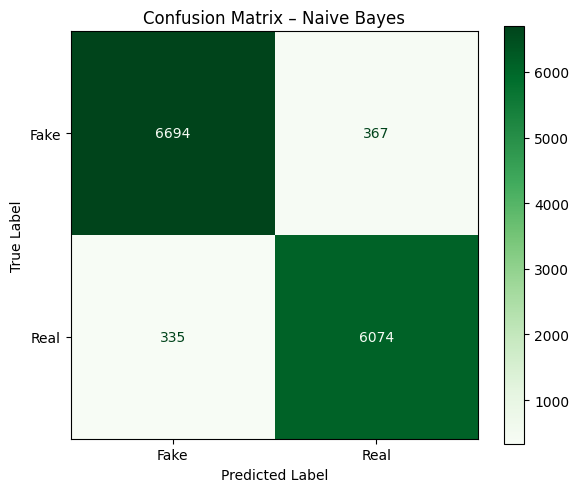

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_nb,display_labels=["Fake", "Real"], cmap="Greens",)

plt.title("Confusion Matrix – Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.gcf().set_size_inches(6, 5)
plt.tight_layout()
plt.show()

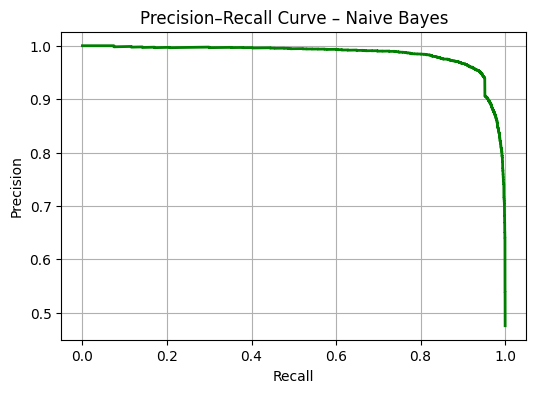

In [94]:
nb_probs = NB.predict_proba(xv_test)[:, 1]
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)

plt.figure(figsize=(6,4))
plt.plot(nb_recall, nb_precision, linewidth=2, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Naive Bayes")
plt.grid(True)
plt.show()

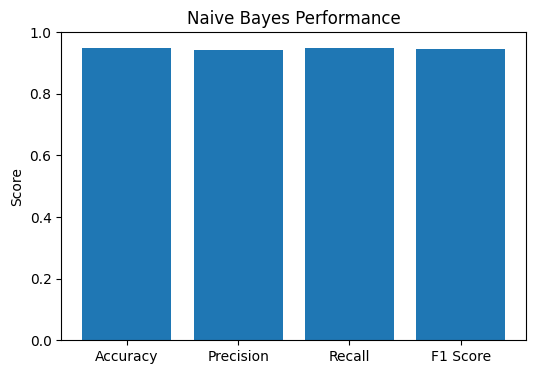

In [95]:
metrics = {
    "Accuracy": accuracy_score(y_test, pred_nb),
    "Precision": precision_score(y_test, pred_nb),
    "Recall": recall_score(y_test, pred_nb),
    "F1 Score": f1_score(y_test, pred_nb)
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.title("Naive Bayes Performance")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

### SVM model

In [62]:
from sklearn.svm import LinearSVC

In [63]:
SVM = LinearSVC()

In [64]:
SVM.fit(xv_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [65]:
pred_svm = SVM.predict(xv_test)

In [66]:
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))

SVM Accuracy: 0.9953229398663697


In [67]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7061
           1       0.99      1.00      1.00      6409

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [68]:
pd.DataFrame([{
    "Model": "Linear SVM",
    "Accuracy": accuracy_score(y_test, pred_svm),
    "Precision": precision_score(y_test, pred_svm),
    "Recall": recall_score(y_test, pred_svm),
    "F1 Score": f1_score(y_test, pred_svm)
}])

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear SVM,0.995323,0.994237,0.995943,0.995089


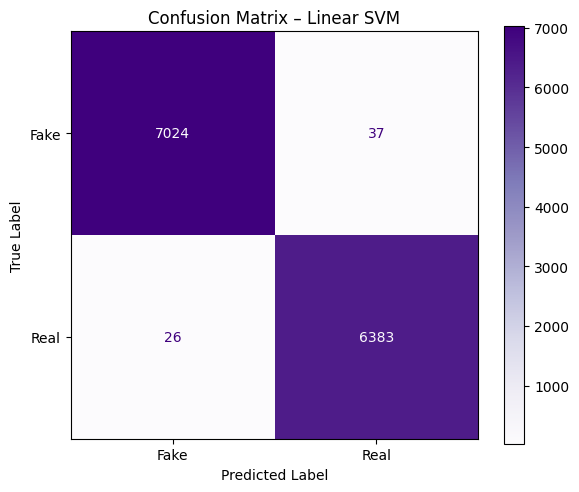

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_svm, display_labels=["Fake", "Real"], cmap="Purples",)

plt.title("Confusion Matrix – Linear SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.gcf().set_size_inches(6, 5)
plt.tight_layout()
plt.show()

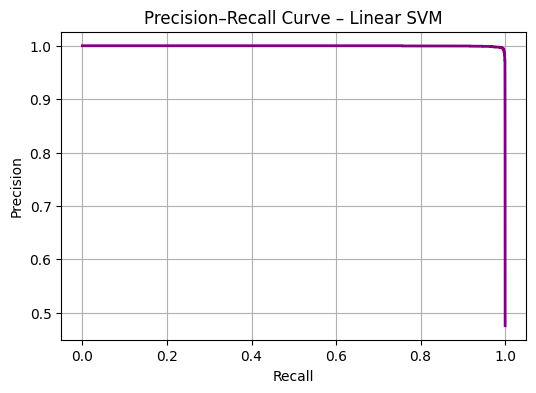

In [97]:
svm_scores = SVM.decision_function(xv_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_scores)

plt.figure(figsize=(6,4))
plt.plot(svm_recall, svm_precision, linewidth=2, color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Linear SVM")
plt.grid(True)
plt.show()

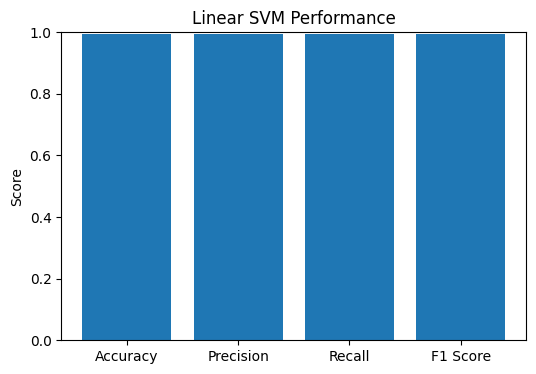

In [96]:
metrics = {
    "Accuracy": accuracy_score(y_test, pred_svm),
    "Precision": precision_score(y_test, pred_svm),
    "Recall": recall_score(y_test, pred_svm),
    "F1 Score": f1_score(y_test, pred_svm)
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.title("Linear SVM Performance")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, pred_lr),
        "Precision": precision_score(y_test, pred_lr),
        "Recall": recall_score(y_test, pred_lr),
        "F1-Score": f1_score(y_test, pred_lr),
    },
    {
        "Model": "Naive Bayes",
        "Accuracy": accuracy_score(y_test, pred_nb),
        "Precision": precision_score(y_test, pred_nb),
        "Recall": recall_score(y_test, pred_nb),
        "F1-Score": f1_score(y_test, pred_nb),
    },
    {
        "Model": "Linear SVM",
        "Accuracy": accuracy_score(y_test, pred_svm),
        "Precision": precision_score(y_test, pred_svm),
        "Recall": recall_score(y_test, pred_svm),
        "F1-Score": f1_score(y_test, pred_svm),
    }
])

In [72]:
results.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
2,Linear SVM,0.995323,0.994237,0.995943,0.995089
0,Logistic Regression,0.987157,0.984161,0.988922,0.986536
1,Naive Bayes,0.947884,0.943021,0.947730,0.945370


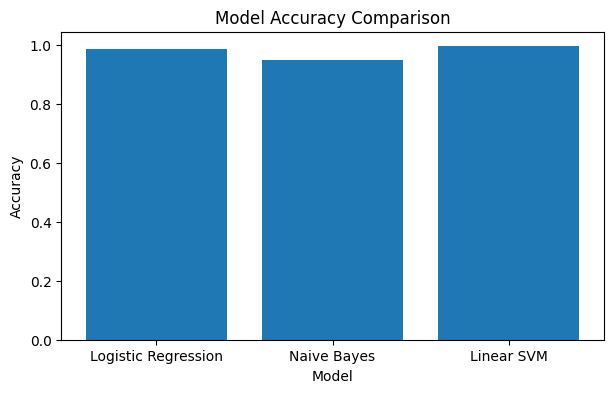

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(results["Model"], results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

### Testing

In [74]:
def predict(model, text):
    # preprocess text
    text = wordopt(text)

    # vectorize
    vector = vectorization.transform([text])

    # predict
    prediction = model.predict(vector)[0]

    return "Real News" if prediction == 1 else "Fake News"

In [75]:
def compare_models(text):
    print("Input News Article:\n")
    print(text)

    print("\nLogistic Regression Prediction:")
    print(predict(LR, text))

    print("\nNaive Bayes Prediction:")
    print(predict(NB, text))

    print("\nLinear SVM Prediction:")
    print(predict(SVM, text))

In [76]:
compare_models("""BREAKING: shocking truth exposed! government secretly printing unlimited money and hiding it
from the public. this will destroy the economy and control citizens. share before it gets deleted!
""")

Input News Article:

BREAKING: shocking truth exposed! government secretly printing unlimited money and hiding it
from the public. this will destroy the economy and control citizens. share before it gets deleted!


Logistic Regression Prediction:
Fake News

Naive Bayes Prediction:
Fake News

Linear SVM Prediction:
Fake News


In [77]:
compare_models("""WASHINGTON (Reuters) - The government announced on Tuesday a set of measures aimed at
reducing inflation, including changes to import taxes and fuel pricing, according to an official
statement released by the finance ministry.
""")

Input News Article:

WASHINGTON (Reuters) - The government announced on Tuesday a set of measures aimed at
reducing inflation, including changes to import taxes and fuel pricing, according to an official
statement released by the finance ministry.


Logistic Regression Prediction:
Real News

Naive Bayes Prediction:
Real News

Linear SVM Prediction:
Real News


In [99]:
compare_models("""Britain’s central bank said on Thursday that inflation is expected
to gradually decline over the next year as energy prices stabilize and consumer demand slows.
""")

Input News Article:

Britain’s central bank said on Thursday that inflation is expected
to gradually decline over the next year as energy prices stabilize and consumer demand slows.


Logistic Regression Prediction:
Real News

Naive Bayes Prediction:
Real News

Linear SVM Prediction:
Real News


In [101]:
compare_models("""SHOCKING NEWS: World leaders meet in secret underground bunker to plan total
economic collapse and introduce a one-world digital currency next month.
""")

Input News Article:

SHOCKING NEWS: World leaders meet in secret underground bunker to plan total
economic collapse and introduce a one-world digital currency next month.


Logistic Regression Prediction:
Fake News

Naive Bayes Prediction:
Real News

Linear SVM Prediction:
Fake News


In [100]:
compare_models("""GENEVA (Reuters) - The World Health Organization reported a decrease in global
COVID-19 cases this month, citing increased vaccination coverage and public health measures.
""")

Input News Article:

GENEVA (Reuters) - The World Health Organization reported a decrease in global
COVID-19 cases this month, citing increased vaccination coverage and public health measures.


Logistic Regression Prediction:
Real News

Naive Bayes Prediction:
Real News

Linear SVM Prediction:
Real News


In [102]:
compare_models("""ALERT: Drinking tap water after midnight has been proven to erase memories and
reduce lifespan. Officials don’t want you to know this!
""")

Input News Article:

ALERT: Drinking tap water after midnight has been proven to erase memories and
reduce lifespan. Officials don’t want you to know this!


Logistic Regression Prediction:
Fake News

Naive Bayes Prediction:
Fake News

Linear SVM Prediction:
Fake News
